# Exercise 1.1.2: Data Acquisition and Visualisation
#### By Jonathan L. Moran (jonathan.moran107@gmail.com)
From the Self-Driving Car Engineer Nanodegree programme offered at Udacity.

## Objectives
* Write a function to visualise the ground truth bounding boxes;
* Make considerations regarding the various classes in your visualisation;
* Produce a single output figure, a grid of images with their corresponding bounding box visualisations.

## 1. Introduction

In [1]:
### Importing required modules

In [2]:
import cv2
import json
import matplotlib as mpl
from matplotlib import colors, patches
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
from typing import List

### 1.1 Visualising Ground Truth Boxes
One of the most fundamental tasks in machine perception is [object detection](https://en.wikipedia.org/wiki/Object_detection). For self-driving vehicles, being able to _detect_ and _localise_ various objects, e.g., pedestrian, vehicle, within a driving scene is cruicial for learning a safe driving policy. 

Image classification is one domain within perception that helps accomplish this important task. In order to train a supervised classification model to recognise classes of objects, we must first provide our model with labelled data. These labels _describe_ the location of key objects within a driving scene. The labels may also describe the type or _class_ (pedestrian, car, etc.) of object that exists at the respective location.

Two-dimensional bounding boxes are often used to describe an objects' location within an image. These bounding boxes are typically _manually annotated_ by human annotators. Once annotated and reviewed for accuracy, these bounding boxes become "ground truth data" corresponding to the _actual_ objects of interest within a scene. In a driving scene, these objects of interest might include vehicles, bicycles, traffic signs and pedestrians. 

Once provided with this _ground truth_ data, supervised image classification models looking for features of interest during training can speed up their "search" over the entire image by looking only within key regions, i.e., the area inside the bounding boxes. Providing the labelled data helps the model learn to classify objects and detect them in unlabelled images.

#### Bounding box visualisation
For our task in Exercise 1.2, we are asked to visualise the set of ground truth bounding boxes which have been annotated in a set of images. These images contain bounding box coordinates and with their respective class labels; `1` for vehicles, `2` for pedestrians, and `4` for [unknown]. Using the programmes we wrote in the previous exercise, we will compute the height and width of each 2D bounding box from the provided coordinates then pass these into a Matplotlib helper function (along with a few other bits of data) to "draw" the 2D rectangle bounding boxes over each object in a driving scene. Ready to get started?

#### Making key assumptions
We will be using the same bounding box data we worked with in our last assignment, [Exercise 1.1: Choosing Metrics](https://github.com/jonathanloganmoran/ND0013-Self-Driving-Car-Engineer/blob/main/1-Object-Detection-in-Urban-Environments/Exercises/1-1-Choosing-Metrics/2022-07-25-Choosing-Metrics-IoU.ipynb). With this data comes a few assumptions we will clarify briefly before diving into our programming task.


The first assumption we make is in regards to the geometry of our bounding boxes. Specifically, we will be given a set of [axis-aligned rectangles](https://en.wikipedia.org/wiki/Rectilinear_polygon) orthogonal to the 2D coordinate plane. This assumption allows us to compute the height and width using basic arithmetic.

The second assumption governs the coordinate plane our bounding boxes will be rendered on. Our dataset consists of 2D bounding boxes, each defined by a set of `x`- and `y`-coordinate pairs. Each bounding box will be described by two `(x, y)` coordinate pairs, the first being the _upper-left_ coordinate pair and the second being the _lower-right_ coordinate pair along the 2D plane. Our coordinate reference system is assumed to have its origin, `(0, 0)`, located at the upper-left most corner of the grid. The `x`-coordinate values will increase along the x-axis going right from the origin, and the `y`-coordinate values will increase going downward from the origin.

In this exercise we will only be visualising the _ground truth_ bounding boxes. Unlike in Exercise 1.1., we will not be utilising the _predicted_ bounding box data.

## 2. Programming Task
### 2.1. Visualising Ground Truth Boxes
In order to visualise the ground truth bounding boxes on a 2D image plane, we will use the Matplotlib [`pyplot`](https://matplotlib.org/stable/api/pyplot_summary.html) Python module. Similar to the last exercise, we will compute the height and width of the 2D orthogonal bounding boxes and provide that along with the reference coordinate pair to a helper function. This helper function will create [Matplotlib patches](https://matplotlib.org/stable/api/patches_api.html) instances of the [`Rectangle`](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html) class.

Let's first specify the parameters we wish to provide our visualisation algorithm, e.g., the class colourmap of the bounding boxes and our figure size/grid dimensions.

In [3]:
### From Udacity's `utils.py`

In [4]:
def get_data():
    """ simple wrapper function to get data """
    with open('data/ground_truth.json') as f:
        ground_truth = json.load(f)
    
    with open('data/predictions.json') as f:
        predictions = json.load(f)

    return ground_truth, predictions

In [5]:
# Fetching just the ground truth data
ground_truth, _ = get_data()

In [6]:
# Ground truth bounding box colours (three-class assumption)
class_colourmap = {1:'cyan',        # Vehicle 
                   2:'magenta',     # Pedestrian 
                   4:'yellow'}      # Unknown 
default = 'red'

In [7]:
# ImageGrid parameters
figsize = (24, 24)
ncols = 5
nrows = (len(ground_truth) // ncols)
axes_pad = 0.2
grid_params = [figsize, nrows, ncols, axes_pad, class_colourmap]

# Rectangle patch parameters
rect_params = {'fill': False,
               'edgecolor': default,
               'linewidth': 2,
               'linestyle': '--'}

Now we can get to the primary task of this assignment, the visualisation of our bounding box dataset.

In [8]:
### From Udacity's `visualization.py`

In [9]:
def bbox_to_rectangle(bbox: List[int], **params) -> mpl.patches.Rectangle:
    """Renders bounding boxes as Matplotlib patches.
    
    Bounding box coordinate pairs form a single 
    orthogonal rectangle about the x-y plane.
    The upper-left coordinates are given by x1, y1
    and the lower-left coordinates by x2, y2.
    
    :param bbox: list of bounding box coordinates
    :param **params: dict-like object of `matplotlib.patches.Rectangle`
        parameters, e.g., `linewidth`, `color`, and `linestyle`.
    :returns: matplotlib Rectangle patch instance
    """
    return patches.Rectangle(xy=(bbox[0], bbox[1]), width=(bbox[2]-bbox[0]), height=(bbox[3]-bbox[1]), **params)

def viz(ground_truth: List[dict], *grid_params, **rect_params):
    """Creates a grid visualisation of dataset.
    
    Bounding boxes are rendered in colours corresponding
    to their respective class labels.
    
    :param ground_truth: list of ground truth bounding box coordinates
    :param *grid_params: list of `matplotlib.Figure` parameters
    :param **rect_params: dict-like object of `matplotlib.Rectangle`
        parameters, e.g., `linewidth`, `color`, and `linestyle`.
    """
    
    # Set up Matplotlib Figure and ImageGrid
    figsize = grid_params[0]
    nrows, ncols = grid_params[1], grid_params[2]
    axes_pad = grid_params[3]
    class_colourmap = grid_params[4]
    fig = plt.figure(figsize=figsize)
    grid = ImageGrid(fig, 111, nrows_ncols=(nrows, ncols), axes_pad=axes_pad)
    grid.axes_all[2].set_title('Ground truth bounding boxes')
    # For every image (scene) in dataset
    for i, scene in enumerate(ground_truth):
        # Display scene image in subplot
        image = cv2.imread('data/images/' + str(scene["filename"]))
        grid[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        grid[i].axis('off')
        for j, bbox in enumerate(scene['boxes']):
            # Get bounding box class label
            cls_bbox = scene['classes'][j]
            # Update bbox colour according to class label
            rect_params['edgecolor'] = class_colourmap.get(cls_bbox, 'red')
            grid[i].add_patch(bbox_to_rectangle(bbox, **rect_params))
    # Save figure as .png image
    plt.savefig(fname='out/2022-08-01-Data-Acquisition-Visualisation-Output.png')
    plt.show()

Let's see what our provided data looks like by visualising the first scene and its corresponding bounding boxes.

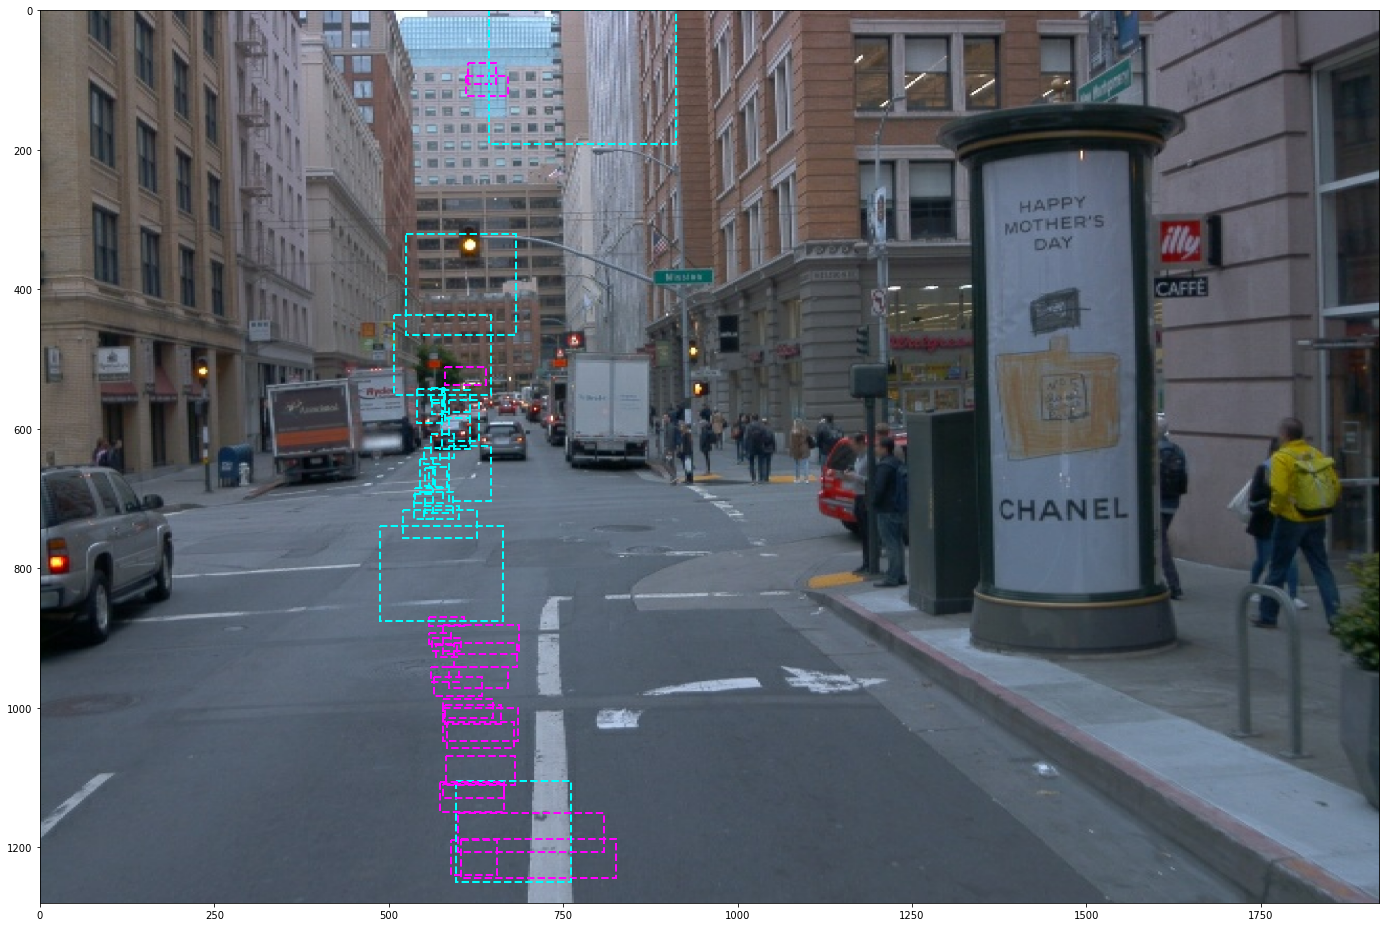

In [10]:
### Plotting the first scene with (erroneous) bounding box data
fig = plt.figure(figsize=(24,24))
image = cv2.imread('data/images/' + str("segment-12251442326766052580_1840_000_1860_000_with_camera_labels_90.png"))
ax = fig.add_subplot(111)
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
for j, bbox in enumerate(ground_truth[0]['boxes']):
    # Get bounding box class
    cls_bbox = ground_truth[0]['classes'][j]
    # Update bbox color
    rect_params['edgecolor'] = class_colourmap.get(cls_bbox, 'red')
    ax.add_patch(bbox_to_rectangle(bbox, **rect_params))
plt.show()

Great! We have our image and its bounding boxes displayed in the figure! However, it looks like something pretty major is off. Either the ground truth coordinates are incorrect, or the annotations belong to an entirely different image. Spolier alert — the coordinate values are correct, but our indexing assumption (the position of the `x`- and `y`-coordinates in the input lists) is not.

Now that hindsight is 20/20, we can see in the above that our bounding boxes are actually _rotated_ along the x-axis. In other words, our `x` and `y` values have been swapped. Since we want to reuse the height and width formulas from the first assignment, we will "fix" the data to fit the assumptions from Exercise 1.1 before proceeding with our core task.

#### Considerations for our input data
In the last assignment, [Exercise 1.1: Choosing Metrics](https://github.com/jonathanloganmoran/ND0013-Self-Driving-Car-Engineer/blob/main/1-Object-Detection-in-Urban-Environments/Exercises/1-1-Choosing-Metrics/2022-07-25-Choosing-Metrics-IoU.ipynb) we worked with the 2D bounding box dataset consisting of `gt_bboxes` and `pred_bboxes` coordinate pairs. In this assignment, we will be utilising only the ground truth bounding box data in `gt_bboxes` from the previous dataset. However, one key difference in the provided data for this task is that the `x`- and `y`- coordinate values for each bounding box have been flipped. That is, from 
$$
\begin{align}
    \texttt{gt_bbox} &= \texttt{[x1, y1, x2, y2]}, \\
    \end{align}
$$
to now
$$
\begin{align}
    \texttt{gt_bbox} &= \texttt{[y1, x1, y2, x2]}. \\
    \end{align}
$$

This has been acknowledged by the Udacity staff in this [Knowledge](https://knowledge.udacity.com/questions/824519) support forum post and confirmed by the Course Mentor as an error. Since they haven't fixed this yet, let's do it ourselves —

In [11]:
### Before: [y1 x1 y2 x2]
ground_truth[0]['boxes'][0]

[576, 545, 617, 584]

In [12]:
### Fixing the error in Udacity's dataset
for i, gt in enumerate(ground_truth):
    for j, gt_bbox in enumerate(gt['boxes']):
        # Swapping the x- and y-coordinate values
        gt_bbox_corrected = [gt_bbox[1], gt_bbox[0], gt_bbox[3], gt_bbox[2]]
        ground_truth[i]['boxes'][j] = gt_bbox_corrected

In [13]:
### After: [x1 y1 x2 y2]
ground_truth[0]['boxes'][0]

[545, 576, 584, 617]

#### Visualisation algorithm in Python

#### Evaluating the visualisation output

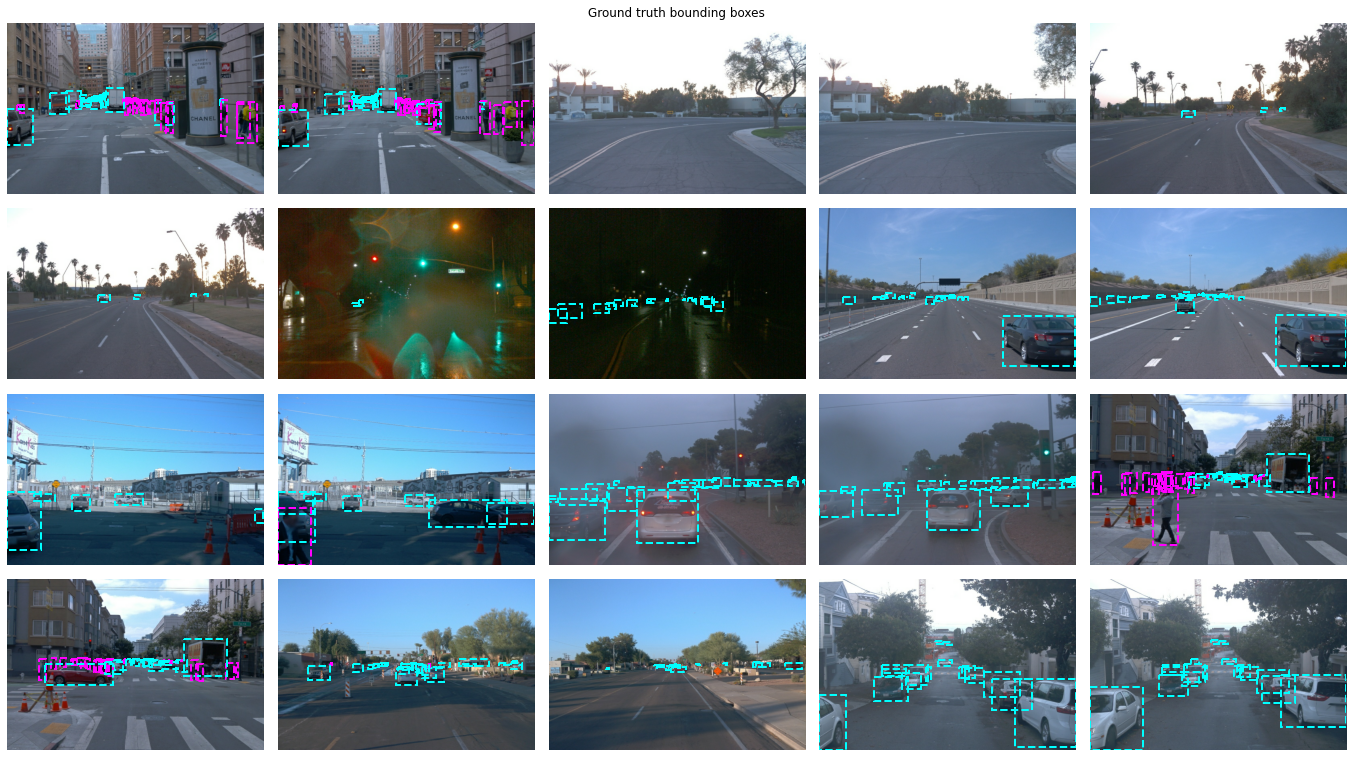

In [14]:
viz(ground_truth, *grid_params, **rect_params)

Fantastic! We can see that every bounding box has been visualised correctly, that is, overlayed onto the respective scene in the correct image coordinates. Each bounding box has been assigned a colour corresponding to its class label in the ground truth data. From the above we can see that the _pedestrian_ class is assigned to the colour `magenta` while the _vehicle_ class is assigned the colour `cyan`.

## 3. Closing Remarks

##### Extensions of task
That wraps up this introduction to bounding box visualisation for Exercise 1.2. In the future, we might want to consider sprucing up our visualisations by adding _class labels_, _legends_, _confidence metrics_, and more. For now, we will leave that task up to the reader (that's you!).

## 4. Future Work
- ✅ Visualise classes with their corresponding labels (see [Exercise 1.4.2](https://github.com/jonathanloganmoran/ND0013-Self-Driving-Car-Engineer/blob/main/1-Object-Detection-in-Urban-Environments/Exercises/1-4-2-Building-Custom-CNNs/2022-09-12-Building-Custom-Convolutional-Neural-Networks.ipynb));
- ⬜️ Visualise bounding boxes with their corresponding predictions;
- ✅ Visualise bounding box predictions wth their corresponding IoU scores (see [Exercise 1.5.1](https://github.com/jonathanloganmoran/ND0013-Self-Driving-Car-Engineer/blob/main/1-Object-Detection-in-Urban-Environments/Exercises/1-4-2-Building-Custom-CNNs/2022-09-12-Building-Custom-Convolutional-Neural-Networks.ipynb)).

## Credits
This assignment was prepared by Thomas Hossler and Michael Virgo et al., Winter 2021 (link [here](https://github.com/udacity/nd013-c1-vision-starter)).

Helpful resources:
* [Dive into Deep Learning: 14.3. Object Detection and Bounding Boxes](https://d2l.ai/chapter_computer-vision/bounding-box.html)
* [Exercise: Data Acquisition and Visualization - Why xy axis seems flipped in figure? | Udacity Knowledge Support forum](https://knowledge.udacity.com/questions/824519)
* [matplotlib.patches.Rectangle](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html)
* [Plot Images + Bounding Boxes (Visualization)](https://www.kaggle.com/code/raivokoot/plot-images-bounding-boxes-visualization)